PRE PRECESSING DATA BOTH TRAIN AND TEST

In [1]:
import pandas as pd
dftest=pd.read_csv(r'F:\guvi projects\CYBERSECURITY\virtualenv\GUIDE_Test.csv')
dftest.head(2)

C:\Users\jrith\AppData\Local\Temp\ipykernel_14808\664636632.py:2: DtypeWarning: Columns (10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  dftest=pd.read_csv(r'C:\CYBERSECURITY\virtualenv\GUIDE_Test.csv')


,Id,OrgId,IncidentId,AlertId,Timestamp,DetectorId,AlertTitle,Category,MitreTechniques,IncidentGrade,...,Roles,OSFamily,OSVersion,AntispamDirection,SuspicionLevel,LastVerdict,CountryCode,State,City,Usage
0,1245540519230,657,11767,87199,2024-06-04T22:56:27.000Z,524,563,LateralMovement,T1021;T1047;T1105;T1569.002,BenignPositive,...,NaN,5,66,NaN,Suspicious,Suspicious,242,1445,10630,Private
1,1400159342154,3,91158,632273,2024-06-03T12:58:26.000Z,2,2,CommandAndControl,NaN,BenignPositive,...,NaN,0,0,NaN,Suspicious,Suspicious,242,1445,10630,Public


In [35]:
with pd.option_context('display.max_columns', None):
    print(dftest.head(2))

              Id  OrgId  IncidentId  AlertId                 Timestamp  \
0  1245540519230    657       11767    87199  2024-06-04T22:56:27.000Z   
1  1400159342154      3       91158   632273  2024-06-03T12:58:26.000Z   

   DetectorId  AlertTitle           Category              MitreTechniques  \
0         524         563    LateralMovement  T1021;T1047;T1105;T1569.002   
1           2           2  CommandAndControl                          NaN   

    IncidentGrade ActionGrouped ActionGranular EntityType EvidenceRole  \
0  BenignPositive           NaN            NaN       User     Impacted   
1  BenignPositive           NaN            NaN    Machine     Impacted   

   DeviceId  Sha256  IpAddress     Url  AccountSid  AccountUpn  \
0     98799  138268     360606  160396        2610        3699   
1      1239  138268     360606  160396      441377      673934   

   AccountObjectId  AccountName  DeviceName  NetworkMessageId  EmailClusterId  \
0           425863          863      15308

In [25]:
dftrain=pd.read_csv(r'F:\guvi projects\CYBERSECURITY\virtualenv\GUIDE_Train.csv')
dftrain.head(2)

,Id,OrgId,IncidentId,AlertId,Timestamp,DetectorId,AlertTitle,Category,MitreTechniques,IncidentGrade,...,ResourceType,Roles,OSFamily,OSVersion,AntispamDirection,SuspicionLevel,LastVerdict,CountryCode,State,City
0,180388628218,0,612,123247,2024-06-04T06:05:15.000Z,7,6,InitialAccess,NaN,TruePositive,...,NaN,NaN,5,66,NaN,NaN,NaN,31,6,3
1,455266534868,88,326,210035,2024-06-14T03:01:25.000Z,58,43,Exfiltration,NaN,FalsePositive,...,NaN,NaN,5,66,NaN,NaN,NaN,242,1445,10630


CHECKING FOR NULL VALUES

In [26]:
missing_percentage = dftrain.isnull().mean()


DROPPED THE COLUMNS WITH MORE THAN 25 PERCENT MISSING VALUES

In [27]:
cols_to_drop = missing_percentage[missing_percentage > 0.25].index
print(cols_to_drop)


Index(['MitreTechniques', 'ActionGrouped', 'ActionGranular', 'EmailClusterId',
       'ThreatFamily', 'ResourceType', 'Roles', 'AntispamDirection',
       'SuspicionLevel', 'LastVerdict'],
      dtype='object')


In [33]:
dftrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9516837 entries, 0 to 9516836
Data columns (total 45 columns):
 #   Column              Dtype  
---  ------              -----  
 0   Id                  int64  
 1   OrgId               int64  
 2   IncidentId          int64  
 3   AlertId             int64  
 4   Timestamp           object 
 5   DetectorId          int64  
 6   AlertTitle          int64  
 7   Category            object 
 8   MitreTechniques     object 
 9   IncidentGrade       object 
 10  ActionGrouped       object 
 11  ActionGranular      object 
 12  EntityType          object 
 13  EvidenceRole        object 
 14  DeviceId            int64  
 15  Sha256              int64  
 16  IpAddress           int64  
 17  Url                 int64  
 18  AccountSid          int64  
 19  AccountUpn          int64  
 20  AccountObjectId     int64  
 21  AccountName         int64  
 22  DeviceName          int64  
 23  NetworkMessageId    int64  
 24  EmailClusterId      floa

In [36]:
dftrain = dftrain.drop(columns=cols_to_drop)


CHECKING AND DROPPING THE MISSING VALUES IN TARGET FEATURE

In [37]:
dftrain.isnull().sum()

Id                        0
OrgId                     0
IncidentId                0
AlertId                   0
Timestamp                 0
DetectorId                0
AlertTitle                0
Category                  0
IncidentGrade         51340
EntityType                0
EvidenceRole              0
DeviceId                  0
Sha256                    0
IpAddress                 0
Url                       0
AccountSid                0
AccountUpn                0
AccountObjectId           0
AccountName               0
DeviceName                0
NetworkMessageId          0
RegistryKey               0
RegistryValueName         0
RegistryValueData         0
ApplicationId             0
ApplicationName           0
OAuthApplicationId        0
FileName                  0
FolderPath                0
ResourceIdName            0
OSFamily                  0
OSVersion                 0
CountryCode               0
State                     0
City                      0
dtype: int64

In [38]:
dftrain.shape

(9516837, 35)

In [39]:

dftrain = dftrain.dropna(subset=['IncidentGrade'])


In [40]:
dftrain.shape

(9465497, 35)

In [19]:
dftest.isnull().sum()

Id                          0
OrgId                       0
IncidentId                  0
AlertId                     0
Timestamp                   0
DetectorId                  0
AlertTitle                  0
Category                    0
MitreTechniques       2307104
IncidentGrade               0
ActionGrouped         4146079
ActionGranular        4146079
EntityType                  0
EvidenceRole                0
DeviceId                    0
Sha256                      0
IpAddress                   0
Url                         0
AccountSid                  0
AccountUpn                  0
AccountObjectId             0
AccountName                 0
DeviceName                  0
NetworkMessageId            0
EmailClusterId        4106285
RegistryKey                 0
RegistryValueName           0
RegistryValueData           0
ApplicationId               0
ApplicationName             0
OAuthApplicationId          0
ThreatFamily          4116614
FileName                    0
FolderPath

In [20]:
missing_percentage = dftest.isnull().mean()

In [21]:
cols_to_drop = missing_percentage[missing_percentage > 0.25].index
print(cols_to_drop)

Index(['MitreTechniques', 'ActionGrouped', 'ActionGranular', 'EmailClusterId',
       'ThreatFamily', 'ResourceType', 'Roles', 'AntispamDirection',
       'SuspicionLevel', 'LastVerdict'],
      dtype='object')


In [24]:
dftest.shape

(4147992, 46)

In [41]:
dftest = dftest.drop(columns=cols_to_drop)

In [42]:
dftest.shape

(4147992, 36)

In [43]:
dftest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4147992 entries, 0 to 4147991
Data columns (total 36 columns):
 #   Column              Dtype 
---  ------              ----- 
 0   Id                  int64 
 1   OrgId               int64 
 2   IncidentId          int64 
 3   AlertId             int64 
 4   Timestamp           object
 5   DetectorId          int64 
 6   AlertTitle          int64 
 7   Category            object
 8   IncidentGrade       object
 9   EntityType          object
 10  EvidenceRole        object
 11  DeviceId            int64 
 12  Sha256              int64 
 13  IpAddress           int64 
 14  Url                 int64 
 15  AccountSid          int64 
 16  AccountUpn          int64 
 17  AccountObjectId     int64 
 18  AccountName         int64 
 19  DeviceName          int64 
 20  NetworkMessageId    int64 
 21  RegistryKey         int64 
 22  RegistryValueName   int64 
 23  RegistryValueData   int64 
 24  ApplicationId       int64 
 25  ApplicationName   

In [47]:
dftest=dftest.drop('Usage',axis=1)

In [48]:
dftest.isnull().sum()

Id                    0
OrgId                 0
IncidentId            0
AlertId               0
Timestamp             0
DetectorId            0
AlertTitle            0
Category              0
IncidentGrade         0
EntityType            0
EvidenceRole          0
DeviceId              0
Sha256                0
IpAddress             0
Url                   0
AccountSid            0
AccountUpn            0
AccountObjectId       0
AccountName           0
DeviceName            0
NetworkMessageId      0
RegistryKey           0
RegistryValueName     0
RegistryValueData     0
ApplicationId         0
ApplicationName       0
OAuthApplicationId    0
FileName              0
FolderPath            0
ResourceIdName        0
OSFamily              0
OSVersion             0
CountryCode           0
State                 0
City                  0
dtype: int64

FEATURE ENGINEERING: CONVERTING TIMESTAMP FEATURE TO DATETIME FORMAT AND EXTRACTING NEW FEATURES LIKE YEAR,MONTH,DAY,HOUR,MINUTE,SECONDS

In [49]:

# Convert the 'Timestamp' column to datetime
dftest['Timestamp'] = pd.to_datetime(dftest['Timestamp'])

In [50]:

# Convert the 'Timestamp' column to datetime
dftrain['Timestamp'] = pd.to_datetime(dftrain['Timestamp'])

In [51]:
# Extract year, month, day, hour, minute, second, and weekday
dftest['Year'] = dftest['Timestamp'].dt.year
dftest['Month'] = dftest['Timestamp'].dt.month
dftest['Day'] = dftest['Timestamp'].dt.day
dftest['Hour'] = dftest['Timestamp'].dt.hour
dftest['Minute'] = dftest['Timestamp'].dt.minute
dftest['Second'] = dftest['Timestamp'].dt.second
dftest['Weekday'] = dftest['Timestamp'].dt.weekday  # Monday is 0 and Sunday is 6

In [52]:
dftest = dftest.drop('Timestamp',axis=1)

In [53]:
# Extract year, month, day, hour, minute, second, and weekday
dftrain['Year'] = dftrain['Timestamp'].dt.year
dftrain['Month'] = dftrain['Timestamp'].dt.month
dftrain['Day'] = dftrain['Timestamp'].dt.day
dftrain['Hour'] = dftrain['Timestamp'].dt.hour
dftrain['Minute'] = dftrain['Timestamp'].dt.minute
dftrain['Second'] = dftrain['Timestamp'].dt.second
dftrain['Weekday'] = dftrain['Timestamp'].dt.weekday  # Monday is 0 and Sunday is 6

In [54]:
dftrain = dftrain.drop('Timestamp',axis=1)

REMOVING DUPLICATES

In [56]:
duplicate_count = dftrain.duplicated().sum()
print(duplicate_count)


542692


In [57]:
dftrain.shape

(9465497, 41)

In [58]:
dftrain = dftrain.drop_duplicates()


In [75]:
dftrain.shape

(8922805, 41)

In [60]:
duplicate_count = dftest.duplicated().sum()
print(duplicate_count)


225297


In [61]:
dftest.shape

(4147992, 41)

In [62]:
dftest = dftest.drop_duplicates()


In [74]:
dftest.shape

(3922695, 41)

In [66]:

pd.set_option('display.max_columns', None)
dftrain.sample(n=10)



,Id,OrgId,IncidentId,AlertId,DetectorId,AlertTitle,Category,IncidentGrade,EntityType,EvidenceRole,DeviceId,Sha256,IpAddress,Url,AccountSid,AccountUpn,AccountObjectId,AccountName,DeviceName,NetworkMessageId,RegistryKey,RegistryValueName,RegistryValueData,ApplicationId,ApplicationName,OAuthApplicationId,FileName,FolderPath,ResourceIdName,OSFamily,OSVersion,CountryCode,State,City,Year,Month,Day,Hour,Minute,Second,Weekday
9510298,1632087573165,1298,36604,1461922,8174,93817,Collection,FalsePositive,CloudApplication,Related,98799,138268,360606,160396,441377,673934,425863,453297,153085,529644,1631,635,860,2251,2,881,289573,117668,3586,5,66,242,1445,10630,2024,6,14,15,54,51,4
8181819,1322849927777,58,473,2929,11,9,InitialAccess,BenignPositive,Mailbox,Impacted,98799,138268,360606,160396,20336,20399,21294,22347,153085,529644,1631,635,860,2251,3421,881,289573,117668,3586,5,66,242,1445,10630,2024,6,13,17,17,44,3
9125564,1288490191871,63,138,946194,4,3,InitialAccess,TruePositive,CloudLogonRequest,Related,98799,138268,360606,160396,441377,673934,425863,453297,153085,529644,1631,635,860,2251,3421,881,289573,117668,3586,5,66,242,1445,10630,2024,6,7,15,38,28,4
1072749,798863919112,39,184364,34903,10,8,InitialAccess,BenignPositive,File,Related,98799,38498,360606,160396,441377,673934,425863,453297,153085,529644,1631,635,860,2251,3421,881,1199,117668,3586,5,66,242,1445,10630,2024,6,13,14,12,42,3
387011,197568498042,5,317,124991,7,6,InitialAccess,TruePositive,Ip,Related,98799,138268,939,160396,441377,673934,425863,453297,153085,529644,1631,635,860,2251,3421,881,289573,117668,3586,5,66,70,290,440,2024,6,3,23,44,55,0
1090323,1434519076902,6,1282,1314,17,1325,Impact,BenignPositive,Ip,Related,98799,138268,12646,160396,441377,673934,425863,453297,153085,529644,1631,635,860,2251,3421,881,289573,117668,3586,5,66,242,1445,10630,2024,5,25,11,39,14,5
962512,317827581057,16,65744,153215,24,33809,Exfiltration,BenignPositive,MailMessage,Impacted,98799,138268,360606,160396,441377,204409,425863,453297,153085,105899,1631,635,860,2251,3421,881,289573,117668,3586,5,66,242,1445,10630,2024,6,10,15,2,19,0
2453071,824633725082,20,2285,196,59,10,Impact,FalsePositive,Ip,Related,98799,138268,580,160396,441377,673934,425863,453297,153085,529644,1631,635,860,2251,3421,881,289573,117668,3586,5,66,242,1445,10630,2024,5,21,19,26,24,1
1189329,721554508418,8,11837,722315,3,4,SuspiciousActivity,TruePositive,Ip,Related,98799,138268,8020,160396,441377,673934,425863,453297,153085,529644,1631,635,860,2251,3421,881,289573,117668,3586,5,66,242,1445,10630,2024,6,7,20,13,0,4
911479,1142461302554,0,97,405492,4,3,InitialAccess,TruePositive,Ip,Related,98799,138268,54424,160396,441377,673934,425863,453297,153085,529644,1631,635,860,2251,3421,881,289573,117668,3586,5,66,5,1445,10630,2024,6,10,2,17,17,0


In [76]:

pd.set_option('display.max_columns', None)
dftest.sample(n=10)


,Id,OrgId,IncidentId,AlertId,DetectorId,AlertTitle,Category,IncidentGrade,EntityType,EvidenceRole,DeviceId,Sha256,IpAddress,Url,AccountSid,AccountUpn,AccountObjectId,AccountName,DeviceName,NetworkMessageId,RegistryKey,RegistryValueName,RegistryValueData,ApplicationId,ApplicationName,OAuthApplicationId,FileName,FolderPath,ResourceIdName,OSFamily,OSVersion,CountryCode,State,City,Year,Month,Day,Hour,Minute,Second,Weekday
1976391,386547060185,35,210,932038,19,15,InitialAccess,TruePositive,Ip,Related,98799,138268,4749,160396,441377,673934,425863,453297,153085,529644,1631,635,860,2251,3421,881,289573,117668,3586,5,66,13,37,42,2024,6,11,0,20,13,1
656976,481036339835,8,8200,720506,3,4,SuspiciousActivity,TruePositive,Url,Related,98799,138268,360606,55,441377,673934,425863,453297,153085,529644,1631,635,860,2251,3421,881,289573,117668,3586,5,66,242,1445,10630,2024,6,6,17,47,41,3
3783852,523986011321,16,240564,476588,24,12115,Exfiltration,BenignPositive,User,Impacted,98799,138268,360606,160396,27120,34625,27152,30176,153085,529644,1631,635,860,2251,3421,881,289573,117668,3586,5,66,242,1445,10630,2024,6,13,19,36,49,3
2540621,283467846587,222,9033,854281,0,0,InitialAccess,FalsePositive,Ip,Related,98799,138268,776,160396,441377,673934,425863,453297,153085,529644,1631,635,860,2251,3421,881,289573,117668,3586,5,66,11,53,50,2024,6,13,1,44,51,3
3166242,541165882028,29,5299,11567,1,1,InitialAccess,BenignPositive,Mailbox,Impacted,98799,138268,360606,160396,25674,24534,25468,27614,153085,529644,1631,635,860,2251,3421,881,289573,117668,3586,5,66,242,1445,10630,2024,6,3,9,56,58,0
2675622,446676600993,410,26423,647999,283,62595,Exfiltration,BenignPositive,MailMessage,Impacted,98799,138268,360606,160396,441377,488615,425863,453297,153085,475578,1631,635,860,2251,3421,881,289573,117668,3586,5,66,242,1445,10630,2024,6,11,13,11,52,1
2056280,1597727837801,3,58789,705524,2,2,CommandAndControl,BenignPositive,Url,Related,98799,138268,360606,14,441377,673934,425863,453297,153085,529644,1631,635,860,2251,3421,881,289573,117668,3586,5,66,242,1445,10630,2024,6,7,6,53,32,4
1284090,1305670062252,30,4884,3709,170,2036,Exfiltration,BenignPositive,File,Impacted,98799,138268,360606,160396,441377,673934,425863,453297,153085,529644,1631,635,860,2251,3421,881,27423,1572,3586,5,66,242,1445,10630,2024,6,11,15,47,2,1
2219490,635655159971,11,403811,897691,4,3,InitialAccess,FalsePositive,Ip,Related,98799,138268,295490,160396,441377,673934,425863,453297,153085,529644,1631,635,860,2251,3421,881,289573,117668,3586,5,66,2,1445,10630,2024,6,4,8,28,10,1
1463714,841813594986,4,467,511,8,7,InitialAccess,BenignPositive,Machine,Impacted,98799,138268,360606,160396,441377,673934,425863,453297,131,529644,1631,635,860,2251,3421,881,289573,117668,3586,5,66,242,1445,10630,2024,5,24,21,42,12,4


EDA :STATISTIC ANALYSIS, CHECKING FOR IMBALANCE DATA PROPORTION IN TARGET FEATURE

In [67]:
# Get summary statistics
summary_stats = dftrain.describe()

# Display summary statistics
print(summary_stats)


                 Id         OrgId    IncidentId       AlertId    DetectorId  \
count  8.922805e+06  8.922805e+06  8.922805e+06  8.922805e+06  8.922805e+06   
mean   8.416239e+11  1.693878e+02  7.002754e+04  4.181938e+05  1.123235e+02   
std    4.967961e+11  3.717533e+02  1.215173e+05  4.642047e+05  4.306532e+02   
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    4.123169e+11  9.000000e+00  4.430000e+02  2.020800e+04  2.000000e+00   
50%    8.418136e+11  4.000000e+01  8.564000e+03  2.310280e+05  1.000000e+01   
75%    1.271310e+12  1.550000e+02  8.151500e+04  7.033120e+05  5.000000e+01   
max    1.709397e+12  6.144000e+03  5.997060e+05  1.721456e+06  9.522000e+03   

         AlertTitle      DeviceId        Sha256     IpAddress           Url  \
count  8.922805e+06  8.922805e+06  8.922805e+06  8.922805e+06  8.922805e+06   
mean   2.939287e+03  9.548293e+04  1.281687e+05  2.810067e+05  1.510310e+05   
std    1.120613e+04  1.679943e+04  3.489336e+04  1.

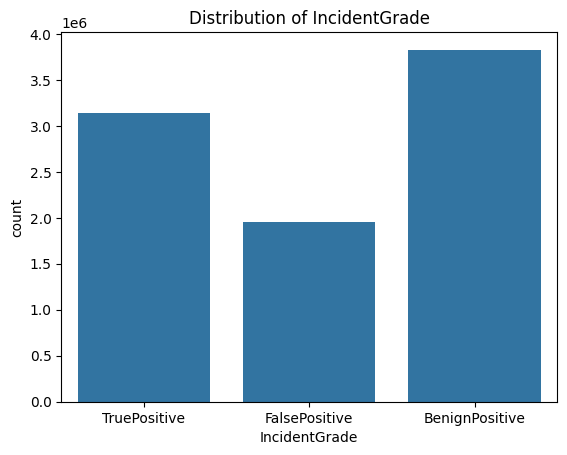

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the distribution of the target variable 'IncidentGrade'
sns.countplot(x='IncidentGrade', data=dftrain)
plt.title('Distribution of IncidentGrade')
plt.show()


In [72]:
# Get summary statistics
summary_stats = dftest.describe()

# Display summary statistics
print(summary_stats)

                 Id         OrgId    IncidentId       AlertId    DetectorId  \
count  3.922695e+06  3.922695e+06  3.922695e+06  3.922695e+06  3.922695e+06   
mean   8.460813e+11  1.672382e+02  6.816684e+04  4.223519e+05  1.060836e+02   
std    4.919382e+11  3.678578e+02  1.204018e+05  4.623677e+05  4.190355e+02   
min    1.000000e+00  0.000000e+00  3.000000e+00  0.000000e+00  0.000000e+00   
25%    4.209068e+11  7.000000e+00  3.780000e+02  2.101500e+04  2.000000e+00   
50%    8.332237e+11  3.900000e+01  7.253000e+03  2.467610e+05  8.000000e+00   
75%    1.271310e+12  1.520000e+02  7.754600e+04  7.092510e+05  4.200000e+01   
max    1.709397e+12  6.138000e+03  5.997000e+05  1.721457e+06  9.520000e+03   

         AlertTitle      DeviceId        Sha256     IpAddress           Url  \
count  3.922695e+06  3.922695e+06  3.922695e+06  3.922695e+06  3.922695e+06   
mean   2.673215e+03  9.557739e+04  1.278995e+05  2.831923e+05  1.512210e+05   
std    1.071732e+04  1.659185e+04  3.537271e+04  1.

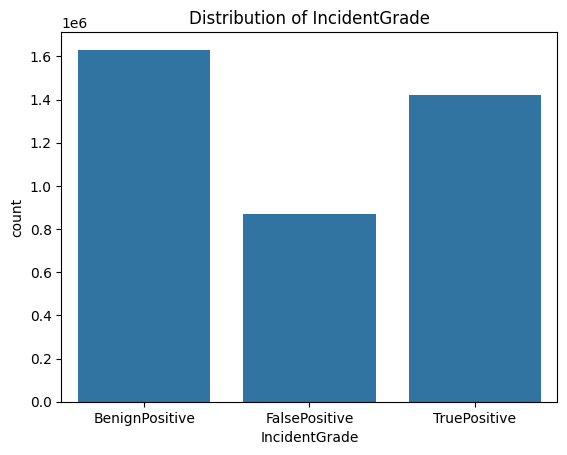

In [73]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the distribution of the target variable 'IncidentGrade'
sns.countplot(x='IncidentGrade', data=dftest)
plt.title('Distribution of IncidentGrade')
plt.show()


In [77]:

dftrain.to_csv('cleandftrain.csv', index=False)

# Save the original DataFrame to a CSV file
dftest.to_csv('cleandftest.csv', index=False)

print("DataFrames saved successfully!")

DataFrames saved successfully!


In [2]:
import pandas as pd
dftest=pd.read_csv(r'C:\CYBERSECURITY\virtualenv\cleandftest.csv')

In [3]:
dftest.head()

,Id,OrgId,IncidentId,AlertId,DetectorId,AlertTitle,Category,IncidentGrade,EntityType,EvidenceRole,...,CountryCode,State,City,Year,Month,Day,Hour,Minute,Second,Weekday
0,1245540519230,657,11767,87199,524,563,LateralMovement,BenignPositive,User,Impacted,...,242,1445,10630,2024,6,4,22,56,27,1
1,1400159342154,3,91158,632273,2,2,CommandAndControl,BenignPositive,Machine,Impacted,...,242,1445,10630,2024,6,3,12,58,26,0
2,1279900255923,145,32247,131719,2932,10807,LateralMovement,BenignPositive,Process,Related,...,242,1445,10630,2024,6,8,3,20,49,5
3,60129547292,222,15294,917686,0,0,InitialAccess,FalsePositive,CloudLogonSession,Related,...,242,1445,10630,2024,6,12,12,7,31,2
4,515396080539,363,7615,5944,27,18,Discovery,BenignPositive,User,Impacted,...,242,1445,10630,2024,6,6,17,42,5,3


REMOVING EXTREME OUTLINERS USING IQR TECHNIQUES, BEST SUITED FOR LARGE AND IMBALANCED DATASET

In [4]:
import pandas as pd

# Function to detect and remove extreme outliers with a high IQR threshold for specific columns
def remove_extreme_outliers_selected_columns(dftest, columns, extreme_threshold=10):
   
    
    # Loop through the specified columns to remove extreme outliers
    for column in columns:
        if pd.api.types.is_numeric_dtype(dftest[column]):  # Only process numeric columns
            Q1 = dftest[column].quantile(0.25)
            Q3 = dftest[column].quantile(0.75)
            IQR = Q3 - Q1
            
            # Use a high threshold for extreme outliers
            lower_bound = Q1 - extreme_threshold * IQR
            upper_bound = Q3 + extreme_threshold * IQR
            
            # Remove only extreme outliers from the specific columns
            dftest = dftest[(dftest[column] >= lower_bound) & (dftest[column] <= upper_bound)]
    
    return dftest


# Replace 'Column1', 'Column2', etc. with actual column names from your DataFrame
specific_columns = [ 'OrgId', 'IncidentId', 'AlertId', 'DetectorId', 'AlertTitle',
       'DeviceId', 'Sha256', 'IpAddress', 'Url', 'AccountSid', 'AccountUpn',
       'AccountObjectId', 'AccountName', 'DeviceName', 'NetworkMessageId',
       'RegistryKey', 'RegistryValueName', 'RegistryValueData',
       'ApplicationId', 'ApplicationName', 'OAuthApplicationId', 'FileName',
       'FolderPath', 'ResourceIdName', 'OSFamily', 'OSVersion']  # Replace with actual columns

# Remove outliers from the specific columns using a very high threshold (e.g., 10x IQR)
dftest = remove_extreme_outliers_selected_columns(dftest, specific_columns, extreme_threshold=10)




In [6]:
dftest.shape

(2061334, 41)

In [7]:
# Save the original DataFrame to a CSV file
dftest.to_csv('finaldftest.csv', index=False)